# Dashboard - Vinicius Alexandre #

## Importing Libraries ##

In [9]:
#Import the libraries needed 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import re

## Code Cell (Helper Function) ##

In [21]:
# Helper to convert star rating text to a numeric value

def get_star_rating(class_list):
    rating_map = {
        'One': 1,
        'Two': 2,
        'Three': 3,
        'Four': 4,
        'Five': 5
    }
    for cls in class_list:
        if cls in rating_map:
            return rating_map[cls]
    return None

## Scrape and Parse Data ##

In [22]:
# Initialize base URL and empty lists
base_url = 'http://books.toscrape.com/catalogue/page-{}.html'
titles, prices, ratings, categories = [], [], [], []

# Scraping first 5 pages
for page in range(1, 6):  
    url = base_url.format(page)
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    books = soup.select('article.product_pod')

# Clean price using regex to remove any symbols
price_text = book.select_one('.price_color').text
price = float(re.search(r'[\d\.]+', price_text).group())

for book in books:
    title = book.h3.a['title']
    price_text = book.select_one('.price_color').text
    price = float(re.search(r'[\d\.]+', price_text).group())  
    rating = get_star_rating(book.p['class'])

# Navigate to book's page to get category
    book_url = "http://books.toscrape.com/catalogue/" + book.h3.a['href']
    book_page = requests.get(book_url)
    book_soup = BeautifulSoup(book_page.text, 'html.parser')
    category = book_soup.select('ul.breadcrumb li a')[2].text.strip()

# Append to lists
    titles.append(title)
    prices.append(price)
    ratings.append(rating)
    categories.append(category)

## Create DataFrame ##

In [23]:
# Create DataFrame
df = pd.DataFrame({
    'Title': titles,
    'Price (£)': prices,
    'Rating': ratings,
    'Category': categories})

# Preview the data
df.head()

,Title,Price (£),Rating,Category
0,"Princess Jellyfish 2-in-1 Omnibus, Vol. 01 (Pr...",13.61,5,Sequential Art
1,Princess Between Worlds (Wide-Awake Princess #5),13.34,5,Fantasy
2,"Pop Gun War, Volume 1: Gift",18.97,1,Sequential Art
3,"Political Suicide: Missteps, Peccadilloes, Bad...",36.28,2,History
4,Patience,10.16,3,Sequential Art


## Figure 1: Scatter Plot

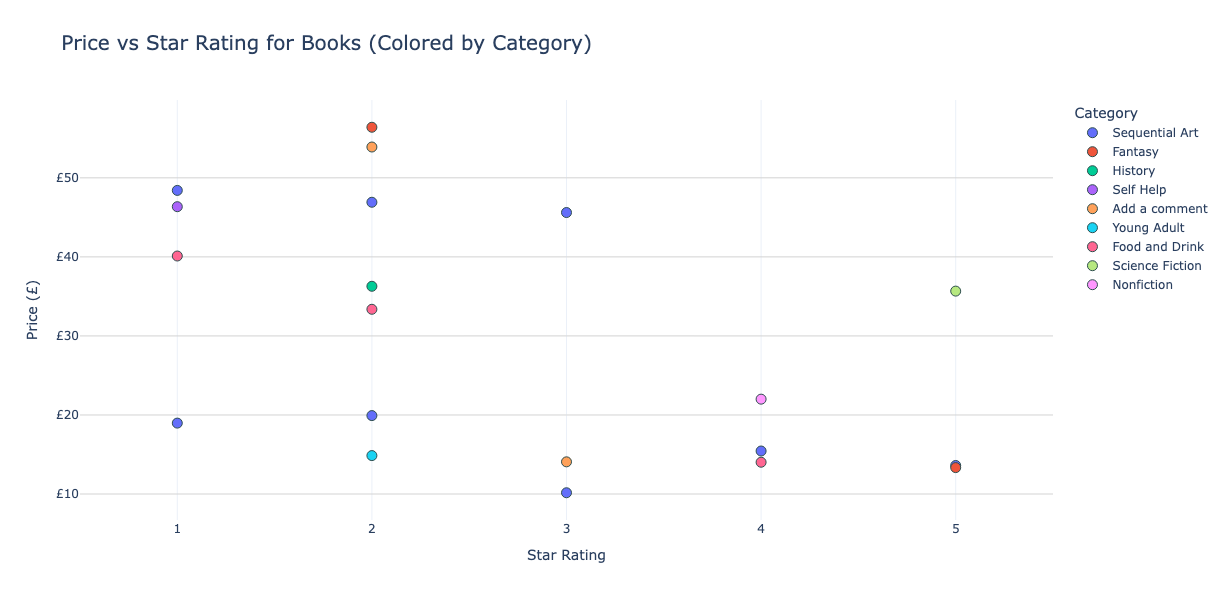

In [24]:
fig1 = px.scatter(
    df,
    x='Rating',
    y='Price (£)',
    color='Category',
    hover_name='Title',
    title='Price vs Star Rating for Books (Colored by Category)',
    labels={'Rating': 'Star Rating', 'Price (£)': 'Price (£)'},
    template='plotly_white')

# Customize marker size and layout

fig1.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig1.update_layout(
    title_font_size=20,
    xaxis=dict(dtick=1, range=[0.5, 5.5]),
    yaxis=dict(tickprefix="£", gridcolor='lightgrey'),
    legend_title_text='Category',
    height=600)

fig1.show()

## Figure 2: Pie Chart ##

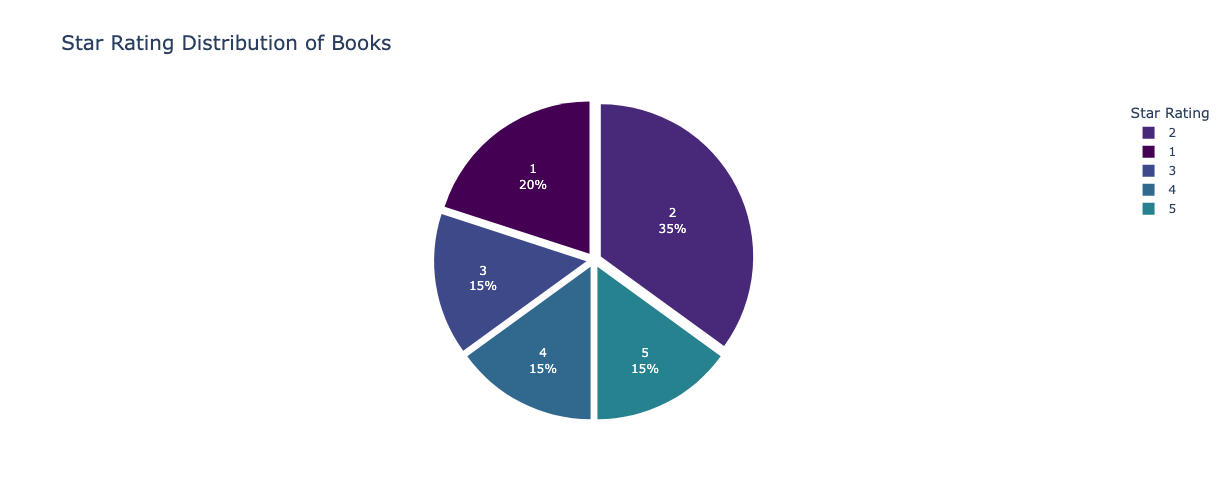

In [25]:
# Count ratings

rating_counts = df['Rating'].value_counts().sort_index()

# Create pie chart

fig2 = px.pie(
    names=rating_counts.index.astype(str),
    values=rating_counts.values,
    title='Star Rating Distribution of Books',
    color=rating_counts.index,
    color_discrete_sequence=px.colors.sequential.Viridis)

# Customize appearance

fig2.update_traces(
    textinfo='percent+label',
    pull=[0.05]*len(rating_counts),
    hovertemplate='Rating: %{label}<br>Count: %{value}<br>Percent: %{percent}')

fig2.update_layout(
    title_font_size=20,
    legend_title_text='Star Rating',
    height=500)

fig2.show()

## Figure 3: Bar Chart ##

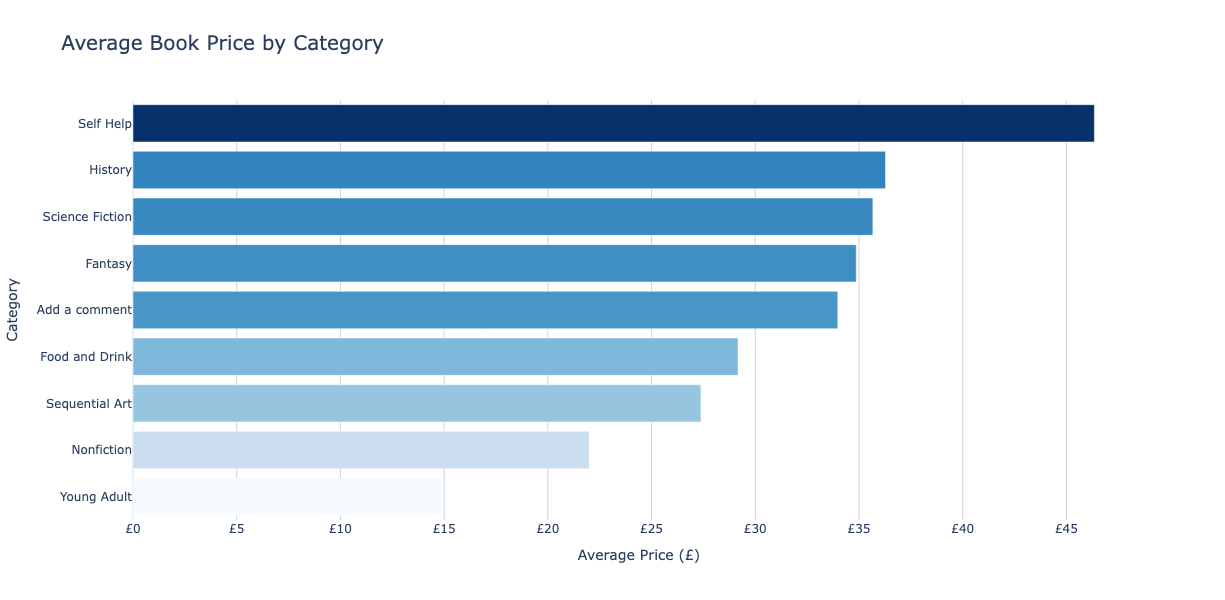

In [26]:
# Recalculate average price per category
avg_price_cat = df.groupby('Category')['Price (£)'].mean().sort_values(ascending=True).round(2)

# Create bar chart

fig3 = px.bar(
    x=avg_price_cat.values,
    y=avg_price_cat.index,
    orientation='h',
    title='Average Book Price by Category',
    labels={'x': 'Average Price (£)', 'y': 'Category'},
    color=avg_price_cat.values,
    color_continuous_scale='Blues',
    template='plotly_white')

# Format layout

fig3.update_layout(
    title_font_size=20,
    xaxis_tickprefix="£",
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(tickfont=dict(size=12)),
    coloraxis_showscale=False,
    height=600)

# Add custom tooltip
fig3.update_traces(hovertemplate='Category: %{y}<br>Avg Price: £%{x:.2f}')

fig3.show()


## Conclusion ##

This project demonstrates how to:

- Scrape data from a real-world (non-financial) website using `requests` and `BeautifulSoup`
- Clean and structure data with `pandas`
- Create engaging and interactive visualizations with `plotly`

### Key Insights:
- Star ratings are concentrated around 3–4 stars.
- Pricing is not strongly correlated with ratings.
- Some book categories have significantly higher average prices.

This process can be extended to other domains such as movies, sports, or weather data for richer analyses.
